In [2]:
import pandas as pd
import sys
sys.path.append('../../')
from config import Config
import matplotlib.pyplot as plt
import math
import ntpath, glob
import numpy as np

In [3]:
SOCC_df = pd.read_csv(Config.CTC_FEATURES_FILE_PATH)

In [4]:
SOCC_df.columns

Index(['Unnamed: 0', 'comment_counter', 'pp_comment_text', 'specific_points',
       'dialogue', 'evidence', 'personal_story', 'solution', 'no_con',
       'no_respect', 'provocative', 'sarcastic', 'non_relevant',
       'unsubstantial', 'no_non_con', 'personal_attack', 'teasing', 'abusive',
       'embarrassment', 'inflammatory', 'no_toxic', 'constructive', 'source',
       'has_conjunctions_and_connectives', 'has_stance_adverbials',
       'has_reasoning_verbs', 'has_modals', 'has_shell_nouns', 'length',
       'average_word_length', 'readability_score', 'personal_exp_score',
       'named_entity_count', 'nSents', 'avg_words_per_sent', 'pos', 'ncaps',
       'noov', 'SEVERE_TOXICITY:probability', 'SEXUALLY_EXPLICIT:probability',
       'TOXICITY:probability', 'TOXICITY_IDENTITY_HATE:probability',
       'TOXICITY_INSULT:probability', 'TOXICITY_OBSCENE:probability',
       'TOXICITY_THREAT:probability', 'ATTACK_ON_AUTHOR:probability',
       'ATTACK_ON_COMMENTER:probability', 'ATTACK_

In [1]:
#SOCC_df['has_content'].dropna()

In [5]:
SOCC_clean_df = SOCC_df.drop(SOCC_df[(SOCC_df['constructive'] <= 0.6) & (SOCC_df['constructive'] >= 0.4)].index)

In [6]:
SOCC_clean_df.shape

(10762, 21)

In [7]:
SOCC_df.shape

(12000, 21)

In [8]:
#SOCC_df = df[df['source'] == 'SOCC']

In [9]:
SOCC_clean_df['constructive_binary'] = SOCC_clean_df['constructive'].apply(lambda x: 1.0 if x > 0.6 else 0.0)

In [10]:
SOCC_df = SOCC_clean_df

In [11]:
SOCC_df['constructive_binary'].value_counts()

1.0    5906
0.0    4856
Name: constructive_binary, dtype: int64

In [12]:
#SOCC_df = pd.read_csv(Config.TRAIN_PATH + 'length_balanced_CTC.csv')

In [5]:
SOCC_con_subset = SOCC_df[SOCC_df['constructive'] == 1.0]
SOCC_noncon_subset = SOCC_df[SOCC_df['constructive'] == 0.0]

In [6]:
SOCC_con_subset.shape

(5906, 55)

In [7]:
SOCC_noncon_subset.shape

(4856, 55)

In [9]:
#SOCC_noncon_subset[SOCC_noncon_subset['non_constructive_characteristics'].str.find('no_non_con') != -1].shape

In [25]:
SOCC_df.shape

(10762, 21)

In [17]:
SOCC_df.columns

Index(['article_id', 'comment_author', 'comment_counter', 'comment_text',
       'njudgements_constructiveness_expt', 'njudgements_toxicity_expt',
       'agree_constructiveness_expt', 'agree_toxicity_expt', 'constructive',
       'constructive_binary', 'crowd_toxicity_level', 'has_content',
       'crowd_discard', 'constructive_characteristics',
       'non_constructive_characteristics', 'toxicity_characteristics',
       'crowd_comments_constructiveness_expt', 'crowd_comments_toxicity_expt',
       'other_con_chars', 'other_noncon_chars', 'other_toxic_chars'],
      dtype='object')

In [10]:
constructive_chars = ['specific_points',
                      'dialogue', 
                      'no_con', 
                      'evidence', 
                      'personal_story', 
                      'solution']

non_constructive_chars = ['no_respect',
                          'no_non_con', 
                          'provocative',
                          'sarcastic',
                          'non_relevant',
                          'unsubstantial']

toxic_chars = ['personal_attack',
               'teasing',
               'no_toxic',
               'abusive',
               'embarrassment',
               'inflammatory']

In [25]:
cchar_con_dist = {}
cchar_noncon_dist = {}
ncchar_con_dist = {}
ncchar_noncon_dist = {}
toxicchar_con_dist = {}
toxicchar_noncon_dist = {}

## Distribution of constructive characteristics in constructive  and non-constructive comments 

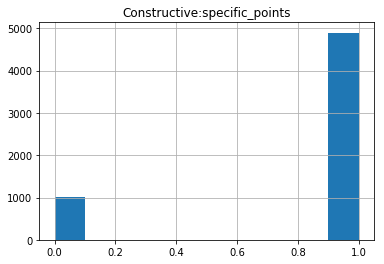

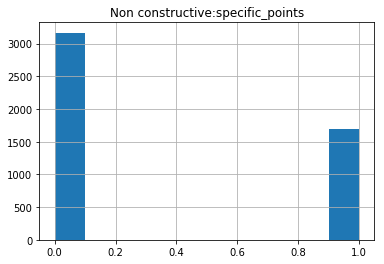

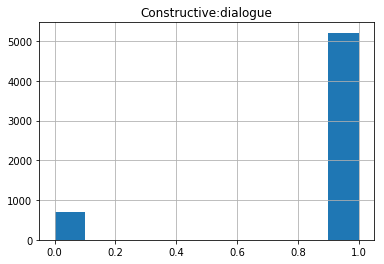

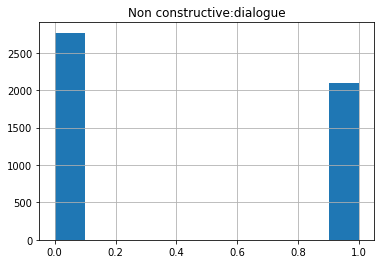

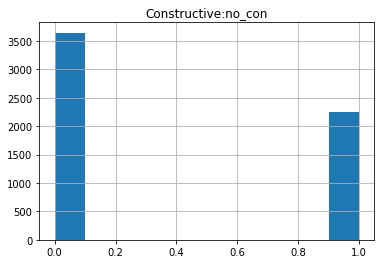

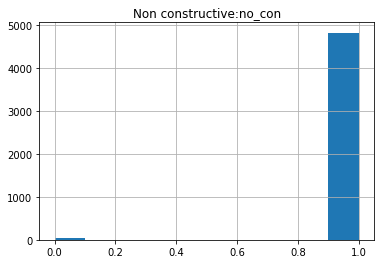

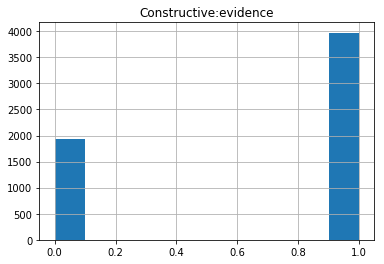

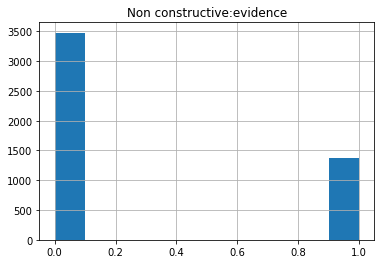

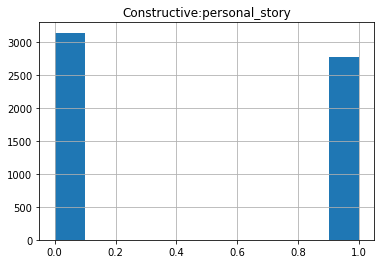

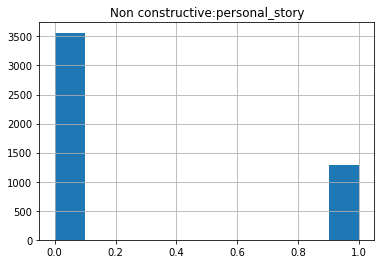

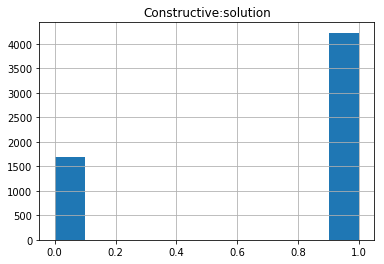

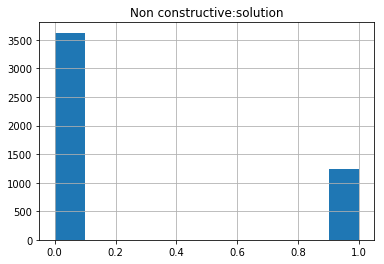

In [26]:
for ch in constructive_chars:    
    SOCC_con_subset.hist(column = [ch])
    plt.title('Constructive:' + ch)    
    
    cchar_con_dist[ch] = SOCC_con_subset[ch].sum()
    
    SOCC_noncon_subset.hist(column = [ch])
    plt.title('Non constructive:' + ch)
    cchar_noncon_dist[ch] = SOCC_noncon_subset[ch].sum()

In [27]:
cchar_con_dist

{'dialogue': 5208,
 'evidence': 3971,
 'no_con': 2259,
 'personal_story': 2768,
 'solution': 4225,
 'specific_points': 4897}

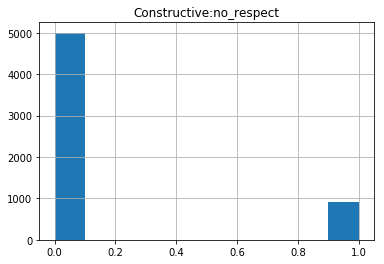

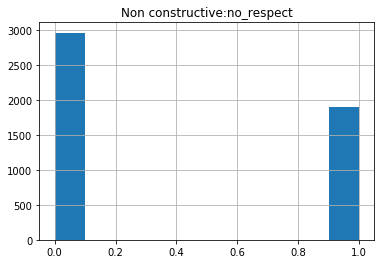

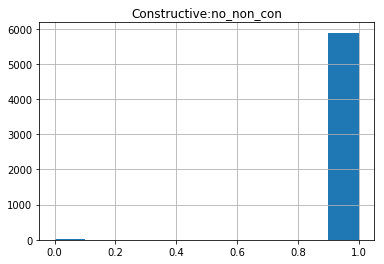

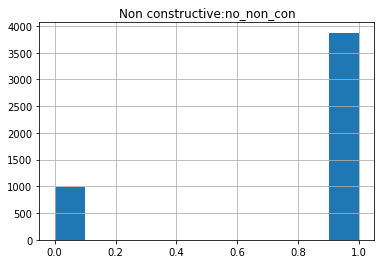

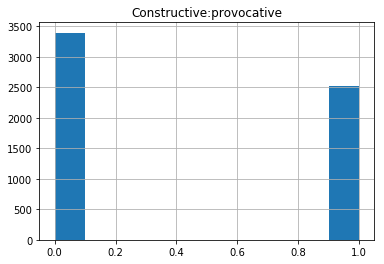

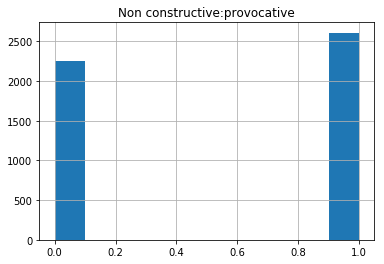

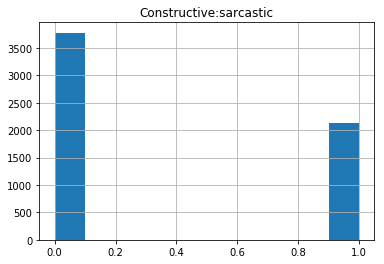

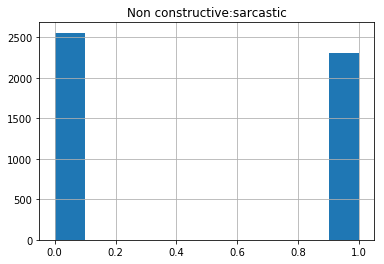

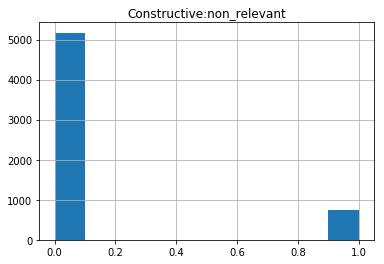

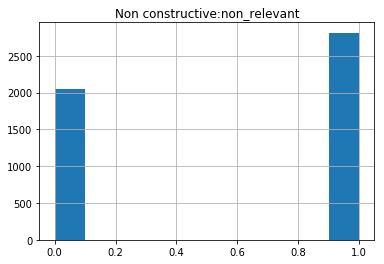

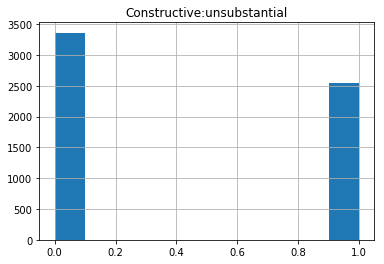

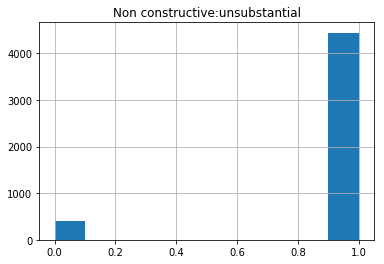

In [28]:
for ch in non_constructive_chars:    
    SOCC_con_subset.hist(column = [ch])
    plt.title('Constructive:' + ch)    
    ncchar_con_dist[ch] = SOCC_con_subset[ch].sum()
    
    SOCC_noncon_subset.hist(column = [ch])
    plt.title('Non constructive:' + ch)    
    ncchar_noncon_dist[ch] = SOCC_noncon_subset[ch].sum()

## Distribution of toxic characteristics in constructive and non-constructive comments 

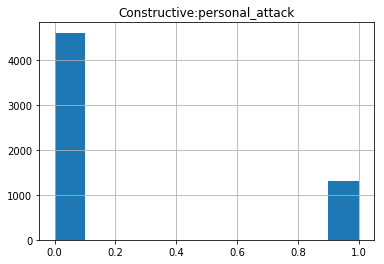

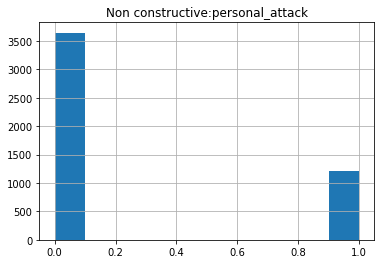

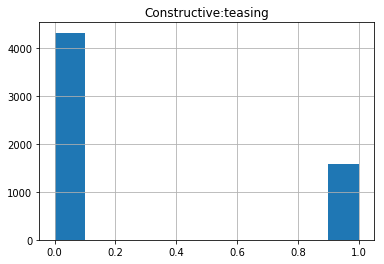

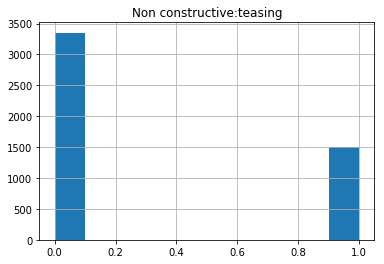

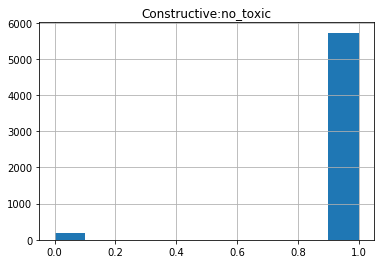

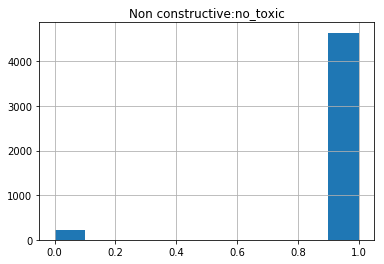

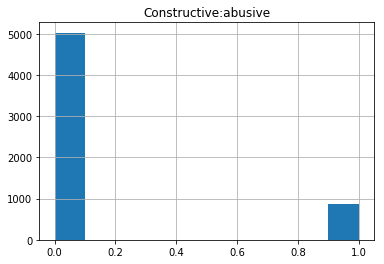

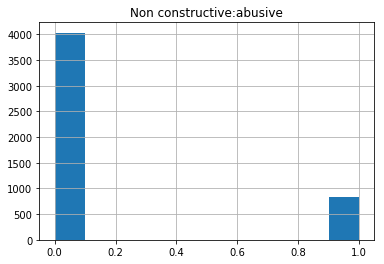

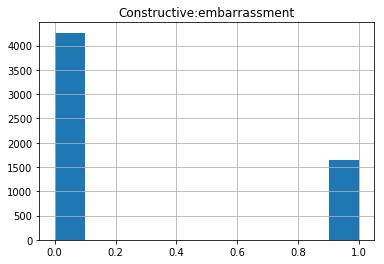

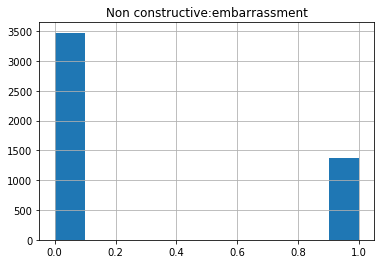

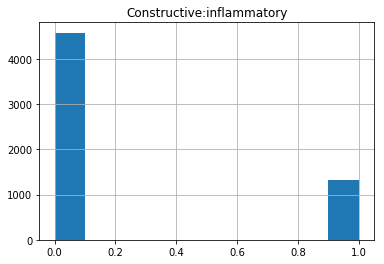

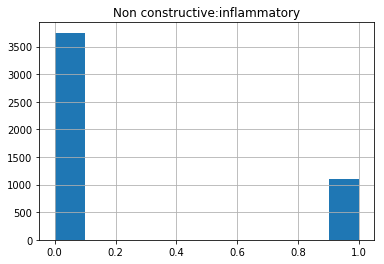

In [29]:
for ch in toxic_chars:    
    SOCC_con_subset.hist(column = [ch])
    plt.title('Constructive:' + ch)    
    toxicchar_con_dist[ch] = SOCC_con_subset[ch].sum()
    
    SOCC_noncon_subset.hist(column = [ch])
    plt.title('Non constructive:' + ch)
    toxicchar_noncon_dist[ch] = SOCC_noncon_subset[ch].sum()

In [30]:
def bar_plots(constructive_freq, 
              non_constructive_freq, 
              title, 
              characteristics,
              save_file_path):
    N = len(characteristics)
    constructive_freq = constructive_freq
    #menStd =   (2, 3, 4, 1, 2)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, constructive_freq, width, color='seagreen')

    non_constructive_freq = non_constructive_freq
    #womenStd =   (3, 5, 2, 3, 3)
    rects2 = ax.bar(ind+width, non_constructive_freq, width, color='royalblue')

    # add some
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(characteristics)
    ax.tick_params(axis='x', rotation=15)

    ax.legend( (rects1[0], rects2[0]), ('Constructive', 'Non-constructive') )
    plt.savefig(save_file_path, format='pdf')

    #plt.show()

In [31]:
constructive_chars_labels = list(cchar_con_dist.keys())
constructive_freq = list(cchar_con_dist.values())
non_constructive_freq = [val for (k, val) in cchar_noncon_dist.items()]
save_file_path = Config.FIGURES_PATH + 'constructive_characteristics_dist.pdf'

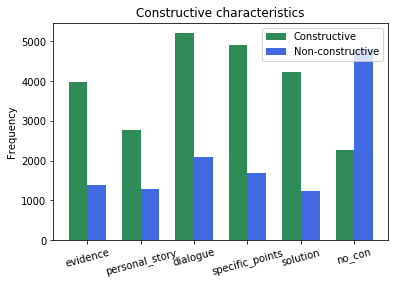

In [32]:
bar_plots(constructive_freq, 
          non_constructive_freq, 
          'Constructive characteristics',
          constructive_chars_labels,
          save_file_path
         )

In [33]:
non_constructive_chars_labels = list(ncchar_con_dist.keys())
constructive_freq = list(ncchar_con_dist.values())
non_constructive_freq = [val for (k, val) in ncchar_noncon_dist.items()]
save_file_path = Config.FIGURES_PATH + 'non_constructive_characteristics_dist.pdf'

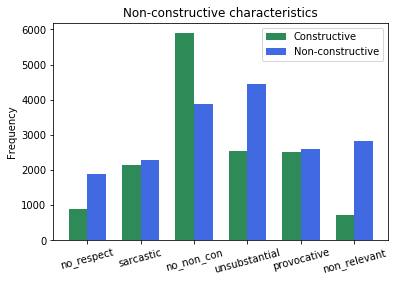

In [34]:
bar_plots(constructive_freq, 
          non_constructive_freq, 
          'Non-constructive characteristics', 
          non_constructive_chars_labels, 
          save_file_path)

In [35]:
toxic_chars_labels = list(toxicchar_con_dist.keys())
constructive_freq = list(toxicchar_con_dist.values())
non_constructive_freq = [val for (k, val) in toxicchar_noncon_dist.items()]
save_file_path = Config.FIGURES_PATH + 'toxic_characteristics_dist.pdf'

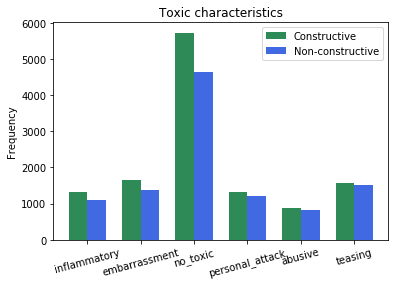

In [36]:
bar_plots(constructive_freq, 
          non_constructive_freq, 
          'Toxic characteristics', 
          toxic_chars_labels,
          save_file_path
         )